# TASK 1 - Simple Linear Regression
This task focusses on the implementation of Linear Regression using the Python Scikit-Learn library; which one of the most popular machine learning libraries in python.

In [1]:
#importing required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.model_selection 

In [2]:
#importing data
url="http://bit.ly/w-data"
importeddata=pd.read_csv(url)
importeddata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#To see first few row of importeddata, we use 
importeddata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#To see last few row of importeddata, we use
importeddata.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#To see the shape of importeddata, we use 
importeddata.shape

(25, 2)

In [6]:
#to see structure of importeddata, we use
importeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#To see Descriptive Statistic of imported data
importeddata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#To check the null values 
importeddata.isnull().sum()

Hours     0
Scores    0
dtype: int64

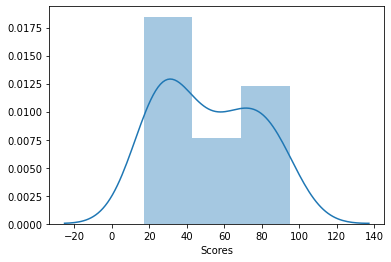

In [9]:
#To check whether data is normally Distributed 
#Normal Distribution

sns.distplot(importeddata['Scores'])

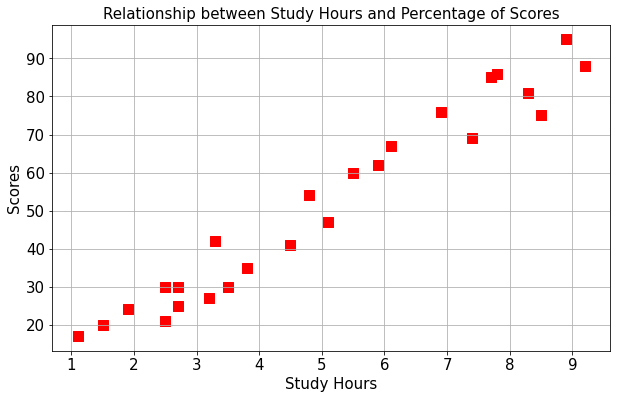

In [10]:
#To see the relationship between Study hours and Score, we use 

plt.figure(figsize = (10,6))
plt.scatter(x = 'Hours', y = 'Scores', data = importeddata, marker = ",", s = 100, c = 'red')

plt.title('Relationship between Study Hours and Percentage of Scores', fontsize = 15)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.grid()
plt.show()

From above graph we can clearly say that there is positive linear relationship between the 'Study Hours' and 'Scores'

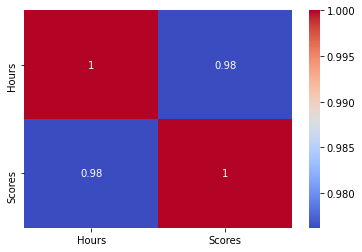

In [11]:
#To check correlation between two variables
sns.heatmap(data=importeddata.corr(),annot=True,cmap="coolwarm")

From above heatmap we can say that 'Scores' and 'Hours' have positive correlation of 0.98 between them. 

# Preparing The Data

In [12]:
X = importeddata.iloc[:,:-1].values
Y = importeddata.iloc[:,1].values


# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
Y_train shape: (20,)
Y_test shape: (5,)


we have splited our data into training and testing sets. Now its time to train our algorithm

In [15]:
#Training linear regression model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

print("Training completed")

Training completed


# Intercept and Coefficient of the Model

In [16]:
#To see coefficients and Intercept
print('Intercept:',lm.intercept_)
print('Coefficients:',lm.coef_)

Intercept: 2.018160041434683
Coefficients: [9.91065648]


# Making Prediction

We have trained our algorithm its time to make prediction

In [17]:
#Predicting the Scores
Y_pred=lm.predict(X_test)

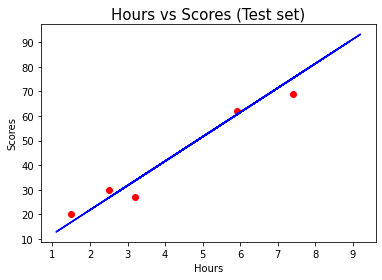

In [18]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,lm.predict(X_train),color="blue")
plt.title("Hours vs Scores (Test set)",fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [19]:
#comparing Actual vs Predicted Values
df1=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
print("Training Score =",lm.score(X_train,Y_train))
print("Testing Score =",lm.score(X_test,Y_test))

Training Score = 0.9515510725211552
Testing Score = 0.9454906892105356


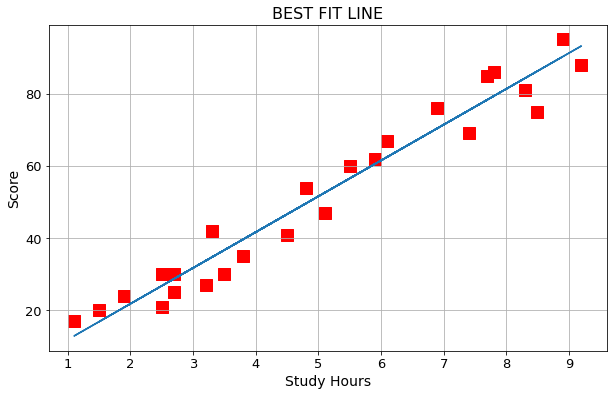

In [21]:
plt.figure(figsize = (10,6))

plt.scatter(x = 'Hours', y = 'Scores', data = importeddata, marker = ',', 
            s = 150, c = 'red')

# Plotting the Line that the model has created
# Equation of line : y = mx + c
# m = reg_coef_
# c = reg_intercept_

plt.plot(X, lm.coef_ * X  + lm.intercept_)

plt.title('BEST FIT LINE', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 14)
plt.ylabel('Score', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

# Evaluating the Model

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score

print('Mean Absolute Error\nMAE :', round(mean_absolute_error(Y_test, Y_pred),4),'\n')
print('Mean Squared Error\nMSE :', round(mean_squared_error(Y_test, Y_pred),4),'\n')
print('Root Mean Squared Error\nRMSE :', round(np.sqrt(mean_squared_error(Y_test, Y_pred)),4),'\n')

print('Explained variance score(R-square) :', round(r2_score(Y_test, Y_pred),4),'\n')

Mean Absolute Error
MAE : 4.1839 

Mean Squared Error
MSE : 21.5988 

Root Mean Squared Error
RMSE : 4.6474 

Explained variance score(R-square) : 0.9455 



Model Accuracy is 94.55%

# Testing with some new data

In [26]:
#testing with some new data

a= float(input('Number of Study Hours : '))
b = np.array(a).reshape(-1,1)
c = lm.predict(b)
print('if a student studies for',a,'Hours/day than predicted Score would be',round(c[0],2))

Number of Study Hours : 9.25
if a student studies for 9.25 Hours/day than predicted Score would be 93.69


Thank You 